# 📚 梯度下降详解与实战

## 🎯 核心概念

**梯度下降 = 找到最低点的自动寻路算法**

---


## 💡 最简单的比喻

### 🏔️ 下山的盲人

想象你是一个**蒙着眼睛**的人，站在山上，想要走到**最低的山谷**（这就是我们要找的"最优解"）。

你的策略是：
1. **摸一摸**周围的地面，找到**最陡的下坡方向**
2. **往那个方向走一小步**
3. **重复**步骤1和2，直到走到谷底

这就是**梯度下降**！

```
   🏔️ 山顶（误差大）
     ↓ 沿着最陡的方向下降
    🚶 你的位置在不断下降
     ↓ 继续沿着最陡的方向
  🏞️ 山谷（误差最小 = 最优解）
```

---


## 🧮 数学原理

### 为什么叫"梯度"下降？

**梯度（Gradient）** = 函数在某一点的**所有方向的斜率**
- 梯度指向**上升最快**的方向
- **负梯度**指向**下降最快**的方向

### 核心公式

```python
# 梯度下降的更新公式
新参数 = 旧参数 - 学习率 × 梯度

# 数学表示
θ_new = θ_old - α × ∂L/∂θ
```

**参数说明：**
- `θ` (theta)：我们要优化的参数（比如线性回归的斜率和截距）
- `α` (alpha)：学习率，控制每次走多大的步子
- `∂L/∂θ`：损失函数对参数的偏导数（就是"梯度"）

---


In [4]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

print("✅ 环境配置完成！")


✅ 环境配置完成！


## 💻 示例1：最简单的梯度下降

### 目标：找到函数 f(x) = (x-3)² + 1 的最小值


In [5]:
def function(x):
    """目标函数：一个简单的抛物线"""
    return (x - 3)**2 + 1

def gradient(x):
    """梯度（导数）：告诉我们应该往哪个方向走"""
    return 2 * (x - 3)

# 梯度下降算法
def gradient_descent(start_x, learning_rate, iterations):
    """
    参数：
    - start_x: 起始点
    - learning_rate: 学习率（步长）
    - iterations: 迭代次数
    """
    x = start_x
    history = [x]  # 记录每一步的位置
    
    print(f"🚶 起点: x={x:.4f}, f(x)={function(x):.4f}\n")
    
    for i in range(iterations):
        # 核心公式：新位置 = 旧位置 - 学习率 × 梯度
        grad = gradient(x)
        x = x - learning_rate * grad
        history.append(x)
        
        print(f"第{i+1}步: x={x:.4f}, f(x)={function(x):.4f}, 梯度={grad:.4f}")
    
    return np.array(history)

# 运行梯度下降
print("="*60)
print("🚀 开始梯度下降：从 x=0 出发，寻找最低点...")
print("="*60)

learning_rate = 0.1
iterations = 10
start = 0.0

history = gradient_descent(start, learning_rate, iterations)

print("\n" + "="*60)
print(f"✅ 找到最优解：x ≈ {history[-1]:.4f}，最小值 ≈ {function(history[-1]):.4f}")
print(f"📌 理论最优解：x = 3.0，最小值 = 1.0")
print("="*60)


🚀 开始梯度下降：从 x=0 出发，寻找最低点...
🚶 起点: x=0.0000, f(x)=10.0000

第1步: x=0.6000, f(x)=6.7600, 梯度=-6.0000
第2步: x=1.0800, f(x)=4.6864, 梯度=-4.8000
第3步: x=1.4640, f(x)=3.3593, 梯度=-3.8400
第4步: x=1.7712, f(x)=2.5099, 梯度=-3.0720
第5步: x=2.0170, f(x)=1.9664, 梯度=-2.4576
第6步: x=2.2136, f(x)=1.6185, 梯度=-1.9661
第7步: x=2.3709, f(x)=1.3958, 梯度=-1.5729
第8步: x=2.4967, f(x)=1.2533, 梯度=-1.2583
第9步: x=2.5973, f(x)=1.1621, 梯度=-1.0066
第10步: x=2.6779, f(x)=1.1038, 梯度=-0.8053

✅ 找到最优解：x ≈ 2.6779，最小值 ≈ 1.1038
📌 理论最优解：x = 3.0，最小值 = 1.0


## 📊 可视化梯度下降过程


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10280\1576916989.py:31: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  plt.tight_layout()


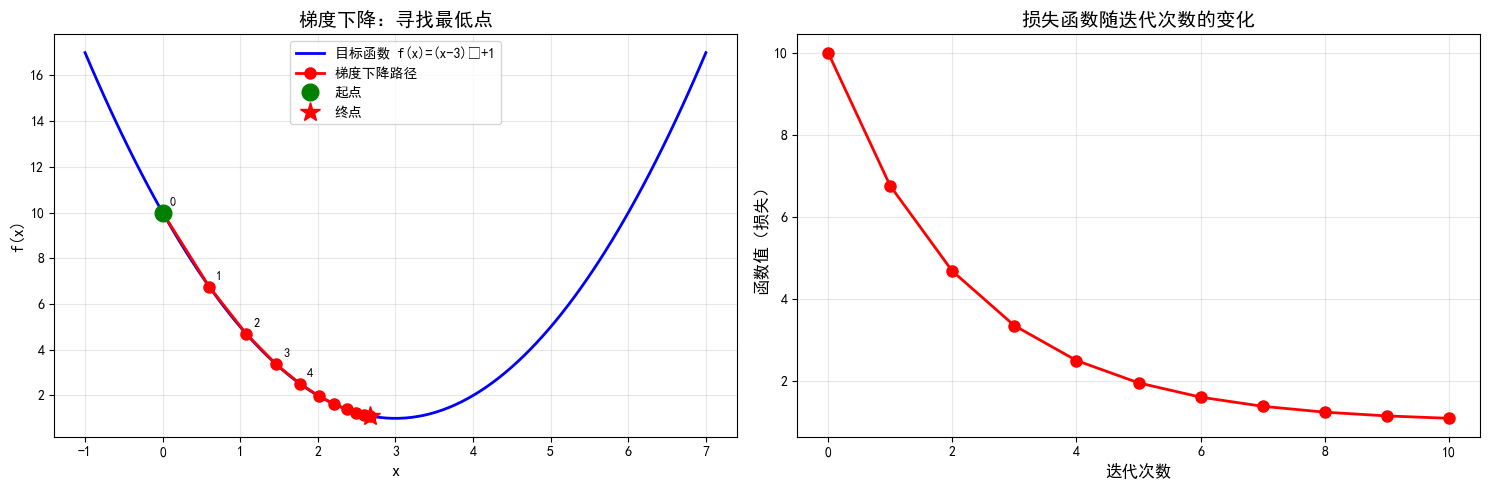

💡 观察：
  - 左图：每一步都往低处走
  - 右图：损失（函数值）不断下降，最终趋于稳定


In [6]:
# 绘制函数曲线和梯度下降路径
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 左图：梯度下降路径
x_range = np.linspace(-1, 7, 100)
y_range = function(x_range)

ax1.plot(x_range, y_range, 'b-', linewidth=2, label='目标函数 f(x)=(x-3)²+1')
ax1.plot(history, function(history), 'ro-', markersize=8, linewidth=2, label='梯度下降路径')
ax1.plot(history[0], function(history[0]), 'go', markersize=12, label='起点')
ax1.plot(history[-1], function(history[-1]), 'r*', markersize=15, label='终点')

# 标注每一步
for i in range(min(5, len(history))):
    ax1.annotate(f'{i}', xy=(history[i], function(history[i])),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('f(x)', fontsize=12)
ax1.set_title('梯度下降：寻找最低点', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# 右图：损失下降曲线
ax2.plot(range(len(history)), function(history), 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('迭代次数', fontsize=12)
ax2.set_ylabel('函数值（损失）', fontsize=12)
ax2.set_title('损失函数随迭代次数的变化', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 观察：")
print("  - 左图：每一步都往低处走")
print("  - 右图：损失（函数值）不断下降，最终趋于稳定")


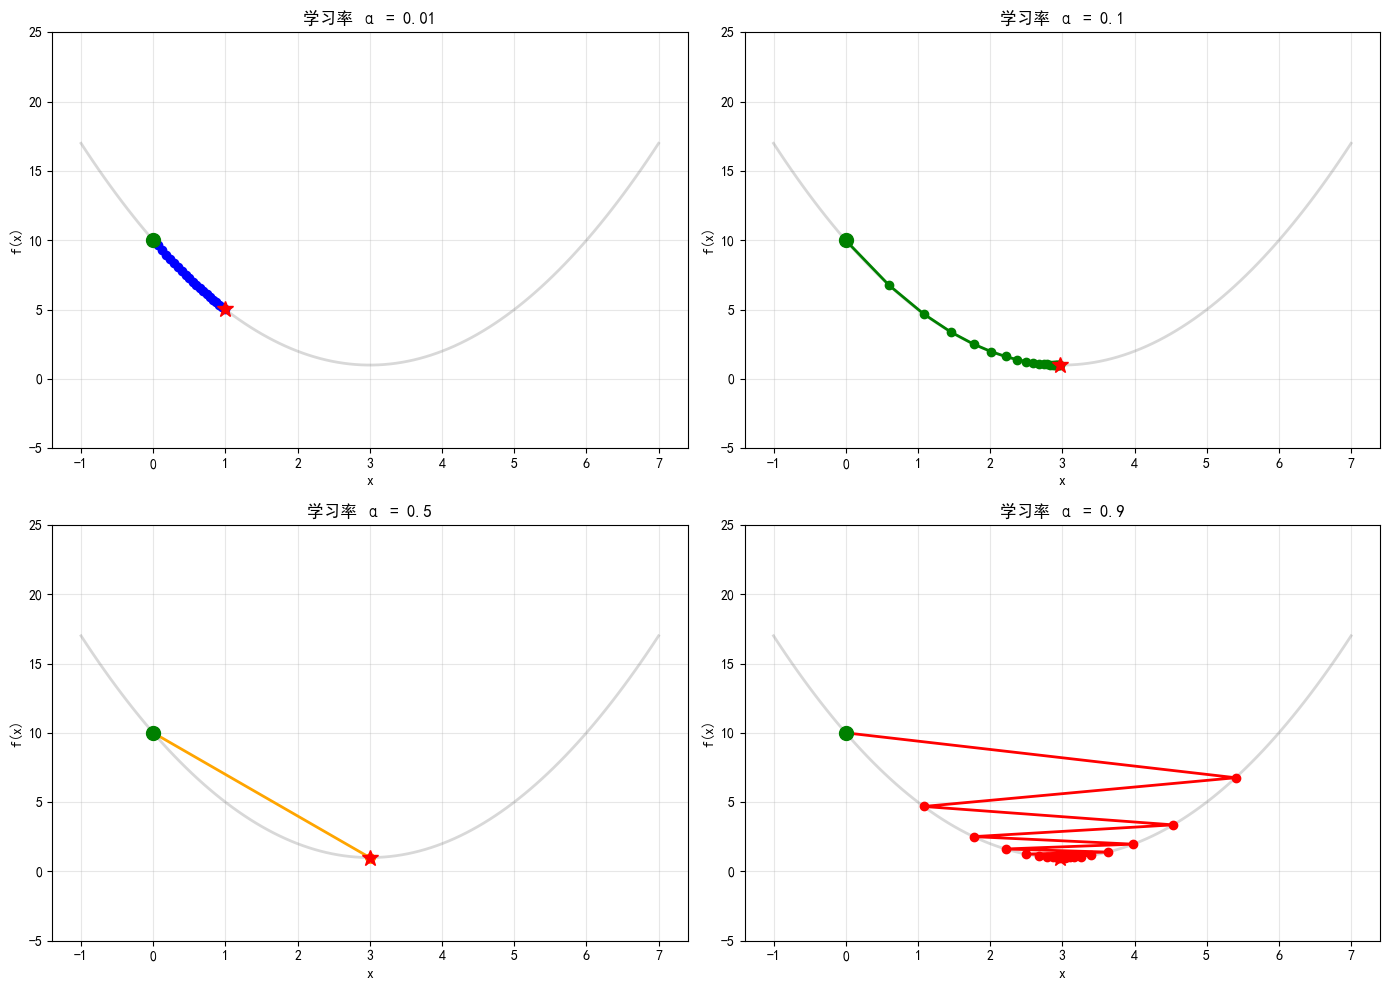

📊 观察不同学习率的效果：
  - α=0.01：太慢，20步还没到最低点
  - α=0.1：刚刚好，稳定收敛
  - α=0.5：有震荡，但最终收敛
  - α=0.9：震荡很大，甚至可能发散


In [7]:
# 对比不同的学习率
learning_rates = [0.01, 0.1, 0.5, 0.9]
colors = ['blue', 'green', 'orange', 'red']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

x_range = np.linspace(-1, 7, 100)
y_range = function(x_range)

for idx, (lr, color) in enumerate(zip(learning_rates, colors)):
    # 运行梯度下降
    x = 0.0
    history_lr = [x]
    
    for _ in range(20):
        grad = gradient(x)
        x = x - lr * grad
        history_lr.append(x)
    
    history_lr = np.array(history_lr)
    
    # 绘制
    axes[idx].plot(x_range, y_range, 'gray', linewidth=2, alpha=0.3)
    axes[idx].plot(history_lr, function(history_lr), 'o-', 
                   color=color, markersize=6, linewidth=2)
    axes[idx].plot(history_lr[0], function(history_lr[0]), 'go', markersize=10)
    axes[idx].plot(history_lr[-1], function(history_lr[-1]), 'r*', markersize=12)
    
    axes[idx].set_title(f'学习率 α = {lr}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('x', fontsize=10)
    axes[idx].set_ylabel('f(x)', fontsize=10)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylim(-5, 25)

plt.tight_layout()
plt.show()

print("📊 观察不同学习率的效果：")
print("  - α=0.01：太慢，20步还没到最低点")
print("  - α=0.1：刚刚好，稳定收敛")
print("  - α=0.5：有震荡，但最终收敛")
print("  - α=0.9：震荡很大，甚至可能发散")


## 🎓 实战应用：用梯度下降做线性回归

### 问题：给定一些数据点，找到最佳拟合直线

**目标函数：** y = w·x + b

**损失函数：** MSE = mean((y_true - y_pred)²)

**目标：** 找到最优的 w 和 b，使得 MSE 最小


📊 生成的数据：
  - 样本数量：50
  - 真实关系：y = 2x + 1 + 噪声
  - X范围：[0.0, 10.0]
  - y范围：[1.2, 21.8]


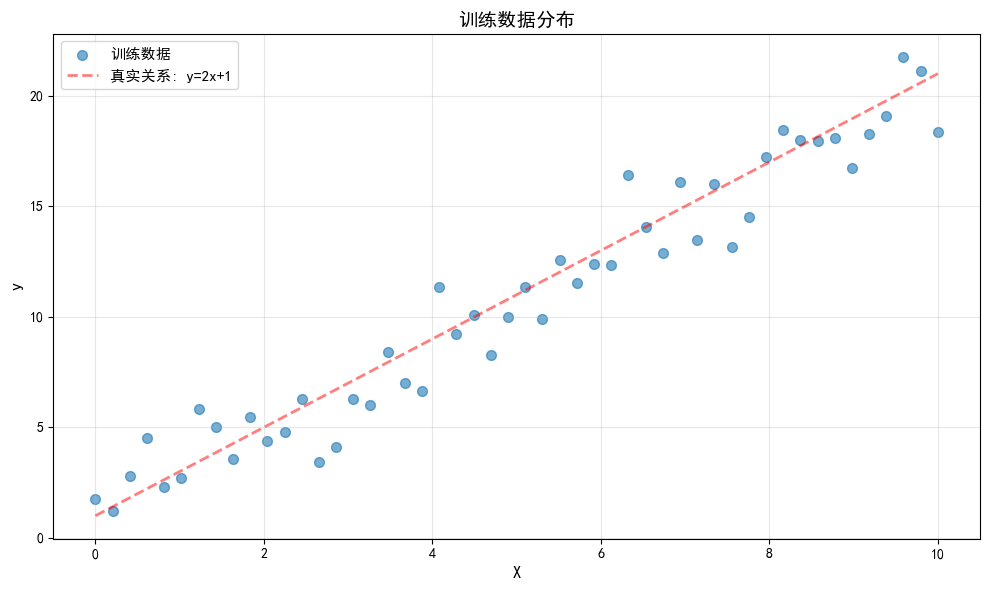

In [8]:
# ===== 生成训练数据 =====
np.random.seed(42)
X = np.linspace(0, 10, 50)
y_true = 2 * X + 1 + np.random.randn(50) * 1.5  # 真实关系：y = 2x + 1 + 噪声

print("📊 生成的数据：")
print(f"  - 样本数量：{len(X)}")
print(f"  - 真实关系：y = 2x + 1 + 噪声")
print(f"  - X范围：[{X.min():.1f}, {X.max():.1f}]")
print(f"  - y范围：[{y_true.min():.1f}, {y_true.max():.1f}]")

# 可视化原始数据
plt.figure(figsize=(10, 6))
plt.scatter(X, y_true, alpha=0.6, s=50, label='训练数据')
plt.plot(X, 2*X + 1, 'r--', linewidth=2, alpha=0.5, label='真实关系: y=2x+1')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('训练数据分布', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [9]:
# ===== 梯度下降求解线性回归 =====
def linear_regression_gradient_descent(X, y, learning_rate=0.01, iterations=100):
    """
    用梯度下降找到最佳的 w 和 b
    """
    n = len(X)
    w = 0.0  # 初始斜率
    b = 0.0  # 初始截距
    
    loss_history = []
    w_history = []
    b_history = []
    
    print(f"🚀 开始训练...")
    print(f"  - 学习率：{learning_rate}")
    print(f"  - 迭代次数：{iterations}")
    print(f"  - 初始参数：w={w:.4f}, b={b:.4f}\n")
    
    for i in range(iterations):
        # 预测值
        y_pred = w * X + b
        
        # 计算损失（均方误差）
        loss = np.mean((y - y_pred) ** 2)
        loss_history.append(loss)
        w_history.append(w)
        b_history.append(b)
        
        # 计算梯度（偏导数）
        # ∂L/∂w = -2 × mean(X × (y - y_pred))
        # ∂L/∂b = -2 × mean(y - y_pred)
        dw = -2 * np.mean(X * (y - y_pred))
        db = -2 * np.mean(y - y_pred)
        
        # 更新参数（梯度下降核心公式）
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if (i+1) % 20 == 0 or i == 0:
            print(f"迭代 {i+1:3d}: 损失={loss:.4f}, w={w:.4f}, b={b:.4f}")
    
    print(f"\n✅ 训练完成！")
    print(f"📊 最终参数：w={w:.4f}, b={b:.4f}")
    print(f"📌 真实参数：w=2.0000, b=1.0000")
    print(f"📉 最终损失：{loss:.4f}")
    
    return w, b, loss_history, w_history, b_history

# 运行梯度下降
print("="*60)
w_optimal, b_optimal, losses, w_hist, b_hist = linear_regression_gradient_descent(
    X, y_true, learning_rate=0.01, iterations=100
)
print("="*60)


🚀 开始训练...
  - 学习率：0.01
  - 迭代次数：100
  - 初始参数：w=0.0000, b=0.0000

迭代   1: 损失=147.2723, w=1.3980, b=0.2132
迭代  20: 损失=1.9902, w=2.0202, b=0.3801
迭代  40: 损失=1.9657, w=2.0099, b=0.4490
迭代  60: 损失=1.9458, w=2.0006, b=0.5112
迭代  80: 损失=1.9294, w=1.9922, b=0.5675
迭代 100: 损失=1.9161, w=1.9846, b=0.6184

✅ 训练完成！
📊 最终参数：w=1.9846, b=0.6184
📌 真实参数：w=2.0000, b=1.0000
📉 最终损失：1.9161


## 📊 可视化训练过程


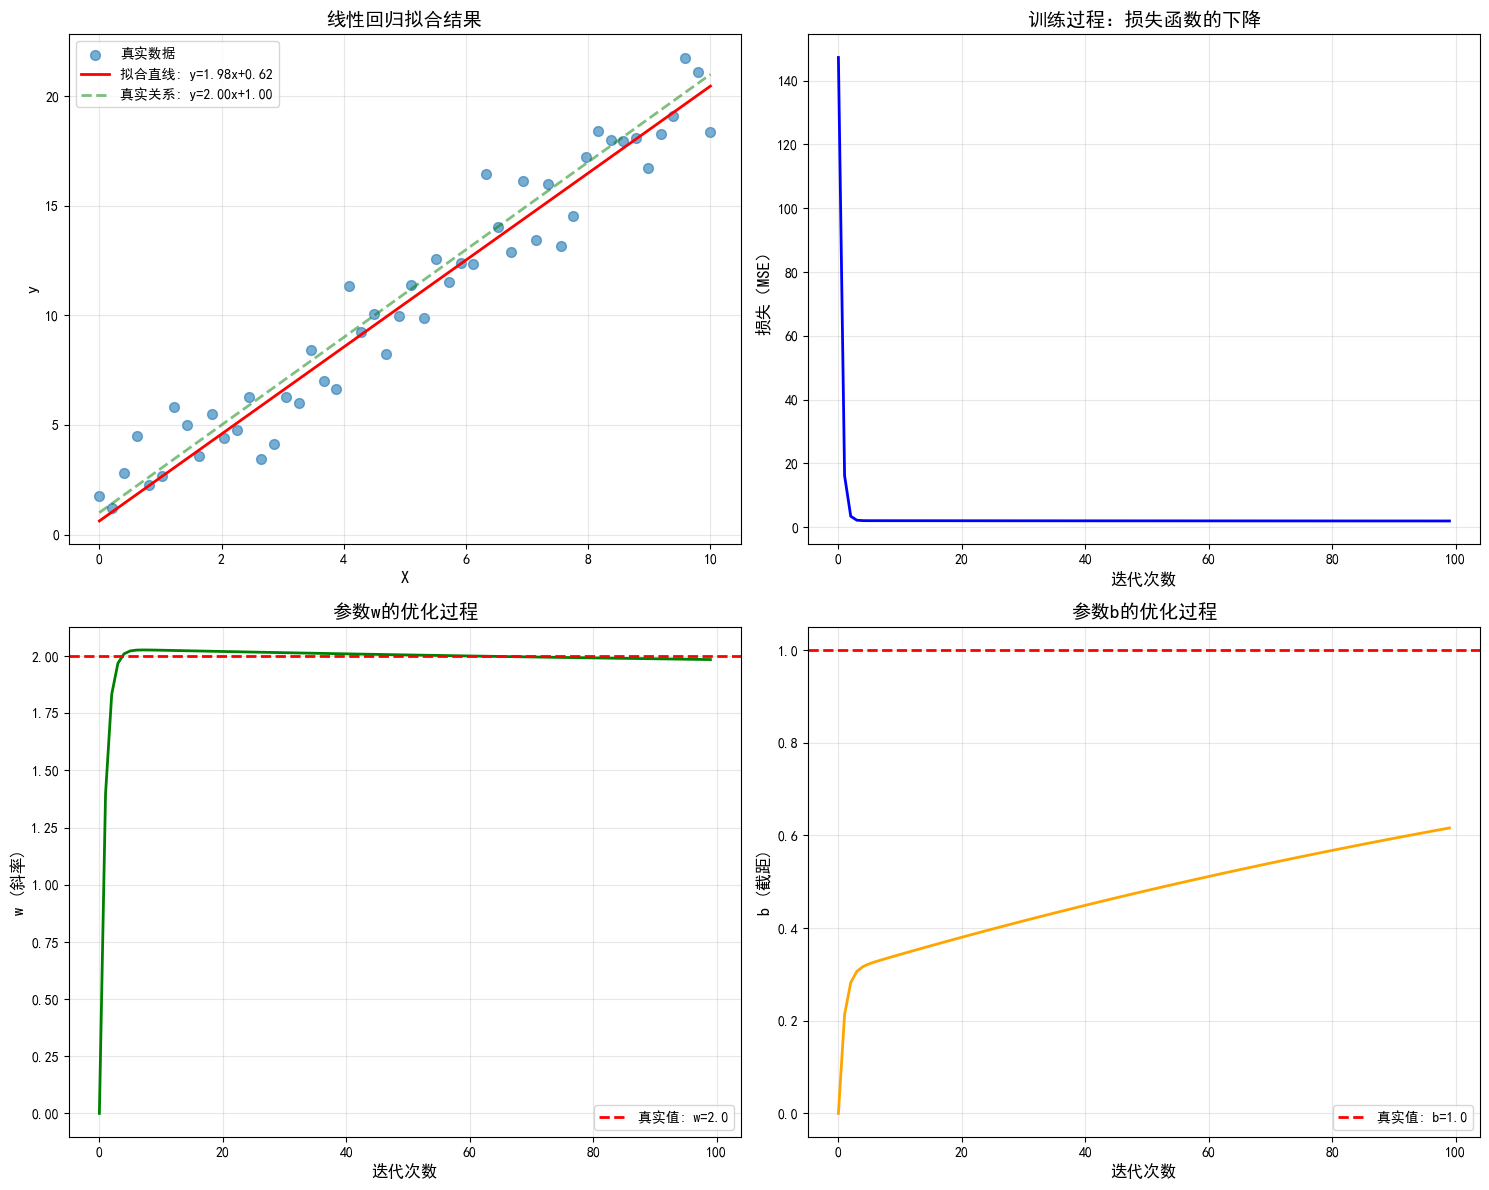


💡 观察训练过程：
  - 左上：拟合直线非常接近真实关系
  - 右上：损失不断下降，最终稳定
  - 左下：参数w逐渐接近真实值2.0
  - 右下：参数b逐渐接近真实值1.0


In [11]:
# ===== 可视化结果 =====
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. 拟合结果
axes[0, 0].scatter(X, y_true, alpha=0.6, s=50, label='真实数据')
axes[0, 0].plot(X, w_optimal * X + b_optimal, 'r-', linewidth=2, 
                label=f'拟合直线: y={w_optimal:.2f}x+{b_optimal:.2f}')
axes[0, 0].plot(X, 2*X + 1, 'g--', linewidth=2, alpha=0.5, 
                label='真实关系: y=2.00x+1.00')
axes[0, 0].set_xlabel('X', fontsize=12)
axes[0, 0].set_ylabel('y', fontsize=12)
axes[0, 0].set_title('线性回归拟合结果', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# 2. 损失下降曲线
axes[0, 1].plot(losses, 'b-', linewidth=2)
axes[0, 1].set_xlabel('迭代次数', fontsize=12)
axes[0, 1].set_ylabel('损失（MSE）', fontsize=12)
axes[0, 1].set_title('训练过程：损失函数的下降', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. 参数w的变化
axes[1, 0].plot(w_hist, 'g-', linewidth=2)
axes[1, 0].axhline(y=2.0, color='r', linestyle='--', linewidth=2, label='真实值: w=2.0')
axes[1, 0].set_xlabel('迭代次数', fontsize=12)
axes[1, 0].set_ylabel('w (斜率)', fontsize=12)
axes[1, 0].set_title('参数w的优化过程', fontsize=14, fontweight='bold')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# 4. 参数b的变化
axes[1, 1].plot(b_hist, 'orange', linewidth=2)
axes[1, 1].axhline(y=1.0, color='r', linestyle='--', linewidth=2, label='真实值: b=1.0')
axes[1, 1].set_xlabel('迭代次数', fontsize=12)
axes[1, 1].set_ylabel('b (截距)', fontsize=12)
axes[1, 1].set_title('参数b的优化过程', fontsize=14, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 观察训练过程：")
print("  - 左上：拟合直线非常接近真实关系")
print("  - 右上：损失不断下降，最终稳定")
print("  - 左下：参数w逐渐接近真实值2.0")
print("  - 右下：参数b逐渐接近真实值1.0")


## 📋 总结

### 🎯 核心要点

| 概念 | 解释 | 比喻 |
|------|------|------|
| **梯度** | 函数在某点的斜率/导数 | 山坡的陡峭程度 |
| **下降** | 沿着负梯度方向移动 | 往下坡走 |
| **学习率** | 每次移动的步长 | 你每次走多大步 |
| **迭代** | 重复计算梯度并更新 | 一步一步走到谷底 |

### 🔑 关键公式

```python
θ_new = θ_old - α × ∂L/∂θ

新参数 = 旧参数 - 学习率 × 梯度
```

### 💡 为什么重要？

**梯度下降是深度学习的核心！**
- ✅ 几乎所有神经网络都用梯度下降训练
- ✅ Word2Vec、BERT、GPT 都是这样训练的
- ✅ 您正在学习的 RAG 系统，底层模型也是用梯度下降训练的

---

## 🚀 下一步学习

**继续学习：**
1. **反向传播**（Backpropagation）：神经网络如何计算梯度
2. **优化器**（Optimizers）：Adam、RMSprop 等高级梯度下降方法
3. **词向量训练**：Word2Vec 如何用梯度下降训练词向量
